In [71]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

### 逻辑回归  
1.数据可视化  
2.sigmoid激活函数  
3.代价函数和梯度  
4.学习参数  
5.评估模型  

In [252]:
data = np.loadtxt('ex2/ex2data1.txt', delimiter=',', dtype=np.str)
inp = data[:,:2].astype(np.float64)
lbl = data[:,-1].astype(np.int8)
m = inp.shape[0]
# lbl = lbl.reshape(m,1)
print(m)

100


数据可视化

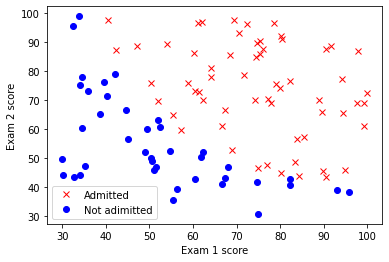

In [253]:
plt.plot(inp[lbl==1,0], inp[lbl==1,1], 'rx', label='Admitted')
plt.plot(inp[lbl==0,0], inp[lbl==0,1], 'bo', label='Not adimitted')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
# plt.grid(True)
plt.show()

sigmoid激活函数

In [33]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

代价函数和梯度

In [254]:
def forward(x, weight):
    out = np.dot(weight.transpose(), x)
    return sigmoid(out)

In [255]:
def criterion(weights, inp, lbl, lmd=0, epxl=1e-5):
    weights = weights.reshape(-1,1)
#     print(weights.shape)
    pred = forward(inp, weights)
#     print(weights.shape)
    return np.mean(-lbl*np.log(pred+epxl) - (1-lbl)*np.log(1-pred+epxl)) + lmd*np.sum(weights[1:,:]**2)/(2*inp.shape[1])

学习参数

scipy.optimize.fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None, initial_simplex=None)[source]

In [259]:
def optim(initial_weight, inp, lbl, lmd=0):
    result = optimize.fmin(criterion, x0=initial_weight, args=(inp, lbl, lmd), maxiter=300, full_output=1)
    return result[0], result[1]

In [260]:
bias = np.ones(m)
X = np.insert(inp, 0, values=bias, axis=1).transpose()
# Y = lbl.reshape(m,1)
weight = np.zeros((X.shape[0],1))
params, mincost = optim(weight, X, lbl)

Optimization terminated successfully.
         Current function value: 0.203483
         Iterations: 156
         Function evaluations: 285


可视化决策边界

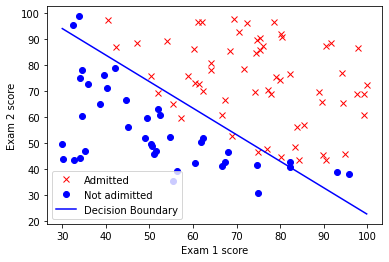

In [261]:
plt.plot(inp[lbl==1,0], inp[lbl==1,1], 'rx', label='Admitted')
plt.plot(inp[lbl==0,0], inp[lbl==0,1], 'bo', label='Not adimitted')
boundary_xs = np.array([np.min(inp[:,0]), np.max(inp[:,0])])
boundary_ys = (-1./params[2])*(params[0] + params[1]*boundary_xs)
# plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
# plt.grid(True)
plt.show()

### 正则化逻辑回归  
1.数据可视化  
2.特征映射（非线性问题）  
3.代价函数和梯度  
4.学习参数  
5.可视化决策边界  

In [207]:
data = np.loadtxt('ex2/ex2data2.txt', delimiter=',', dtype=np.str)
inp, lbl = data[:,:2].astype(np.float64), data[:,-1].astype(np.int8)
m = inp.shape[0]

数据可视化

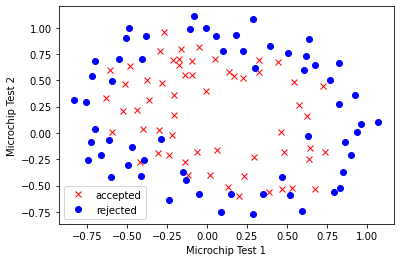

In [188]:
def visu_data():
    plt.plot(inp[lbl==1,0], inp[lbl==1,1], 'rx', label='accepted')
    plt.plot(inp[lbl==0,0], inp[lbl==0,1], 'bo', label='rejected')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
# plt.show()
visu_data()

特征映射（非线性问题）

In [137]:
def feature_map(x1, x2):
    degree = 6
    out = []
    for i in range(1,degree+1):
        for j in range(0,i+1):
            term1 = x1**(i-j)
            term2 = x2**j
            out.append(term1*term2)
    return out

求解最优化参数

In [238]:
def optim_reg(weight, inp, lbl, lmd=0.0):
    print(weight.shape)
    res = optimize.minimize(criterion, weight, args=(inp, lbl, lmd), 
                            method='BFGS', options={"maxiter":500, "disp":False})
    return res.x, res.fun

In [249]:
fm = feature_map(inp[:,0], inp[:,1])
X = np.array(fm)
bias = np.ones((1,m))
X = np.vstack((bias, X))
print("input shape:", X.shape)
weight = np.zeros((X.shape[0],1))
lmd = 1
# params, mincost = optim(weight, X, lbl,lmd)
params, mincost = optim_reg(weight, X, lbl, lmd)

input shape: (28, 118)
(28, 1)


可视化决策边界

In [250]:
# visu_data()
def visu_db():
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals), len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            feats = feature_map(xvals[i], yvals[j])
            feats.insert(0,1)
    #         print(feats)
    #         zvals[i][j] = forward(params.reshape(-1,1), np.array(feats).reshape(-1,1))
            zvals[i][j] = np.dot(params.reshape(1,-1), np.array(feats).reshape(-1,1))
    zvals = zvals.transpose()
    u, v = np.meshgrid(xvals, yvals)
    cnt = plt.contour(xvals, yvals, zvals, [0])
    fmt = {0:'Lambda=%d'%lmd}
    plt.clabel(cnt, inline=1, fontsize=15, fmt=fmt)
    plt.title("Decision Boundry")
# plt.show()
#         break
#     break

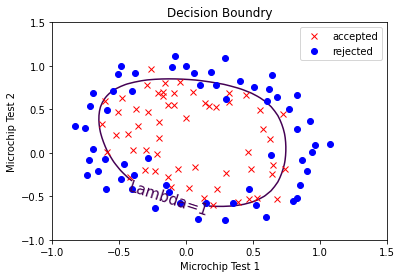

In [251]:
visu_data()
visu_db()